In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv("Transformed_Housing_Data_2.csv")
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zip_Group_Zipcode_Group_1,Zip_Group_Zipcode_Group_2,Zip_Group_Zipcode_Group_3,Zip_Group_Zipcode_Group_4,Zip_Group_Zipcode_Group_5,Zip_Group_Zipcode_Group_6,Zip_Group_Zipcode_Group_7,Zip_Group_Zipcode_Group_8,Zip_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


# Mean Regression Model

In [3]:
data['mean_sales'] = data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

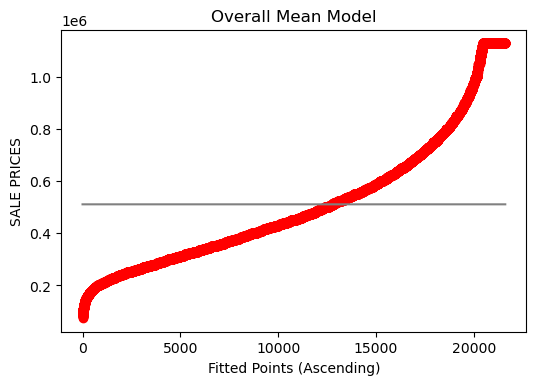

In [4]:
plt.figure(dpi = 100)
k = range(0, len(data))
plt.scatter(k, data['Sale_Price'].sort_values(), color = 'Red', label = 'Actual Sale Prices')
plt.plot(k, data['mean_sales'].sort_values(), color = 'grey', label = 'Predicted Prices')
plt.xlabel('Fitted Points (Ascending)')
plt.ylabel("SALE PRICES")
plt.title("Overall Mean Model")
plt.show()

In [5]:
grades_mean = data.pivot_table(values = 'Sale_Price', columns = 'Overall Grade', aggfunc = np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [6]:
bedroom_mean = data.pivot_table(values = 'Sale_Price', columns = 'No of Bedrooms', aggfunc = np.mean)
bedroom_mean

No of Bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
Sale_Price,397113.461538,317052.809045,398325.473722,455923.012725,595408.655428,675841.61524,681622.428044,728726.763158,754946.153846,823858.166667,813191.666667,520000.0,640000.0


In [7]:
def bathroom(value):
    if 0<value<=1:
        return 1
    if 1<value<=2:
        return 2
    if 2<value<=3:
        return 3
    if 3<value<=4:
        return 4
    if 4<value<=5:
        return 5
    if 5<value<=6:
        return 6
    if 6<value<=7:
        return 7
    if 7<value<=8:
        return 8
    else:
        return 0

data['No of Bathrooms'] = data['No of Bathrooms'].apply(bathroom)
data['No of Bathrooms'].unique()

array([1, 3, 2, 5, 4, 0, 6, 7, 8], dtype=int64)

In [8]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zip_Group_Zipcode_Group_1,Zip_Group_Zipcode_Group_2,Zip_Group_Zipcode_Group_3,Zip_Group_Zipcode_Group_4,Zip_Group_Zipcode_Group_5,Zip_Group_Zipcode_Group_6,Zip_Group_Zipcode_Group_7,Zip_Group_Zipcode_Group_8,Zip_Group_Zipcode_Group_9,mean_sales
0,221900.0,3,1,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,511618.558147
1,538000.0,3,3,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,1,0,0,0,0,0,0,0,511618.558147
2,180000.0,2,1,770.0,10000.0,1.0,0,6,770.0,0,...,0,1,0,0,0,0,0,0,0,511618.558147
3,604000.0,4,3,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,1,0,0,0,0,0,0,511618.558147
4,510000.0,3,2,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,1,0,0,0,0,0,511618.558147


In [9]:
bathroom_mean = data.pivot_table(values = 'Sale_Price', columns = 'No of Bathrooms', aggfunc = np.mean)
bathroom_mean

No of Bathrooms,0,1,2,3,4,5,6,7,8
Sale_Price,432052.5,345887.888974,443168.817009,557882.607753,841163.718634,982248.32287,1.056577e+06,1.074646e+06,959681.25


In [10]:
data['grade_mean'] = 0
for i in grades_mean.columns:
    data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]

data['grade_mean'].head()

<ipython-input-10-f354e6f291f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
<ipython-input-10-f354e6f291f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

# Residual Plots

- Residual = Prediction - Actual
- Scatter plotof above difference is Residual Plot

In [11]:
mean_difference = data['mean_sales'] - data['Sale_Price']
grade_mean_difference = data['grade_mean'] - data['Sale_Price']
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zip_Group_Zipcode_Group_2,Zip_Group_Zipcode_Group_3,Zip_Group_Zipcode_Group_4,Zip_Group_Zipcode_Group_5,Zip_Group_Zipcode_Group_6,Zip_Group_Zipcode_Group_7,Zip_Group_Zipcode_Group_8,Zip_Group_Zipcode_Group_9,mean_sales,grade_mean
0,221900.0,3,1,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,511618.558147,402239.619779
1,538000.0,3,3,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,0,0,0,0,0,0,511618.558147,402239.619779
2,180000.0,2,1,770.0,10000.0,1.0,0,6,770.0,0,...,1,0,0,0,0,0,0,0,511618.558147,301882.014720
3,604000.0,4,3,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,1,0,0,0,0,0,0,511618.558147,402239.619779
4,510000.0,3,2,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,1,0,0,0,0,0,511618.558147,537584.082097


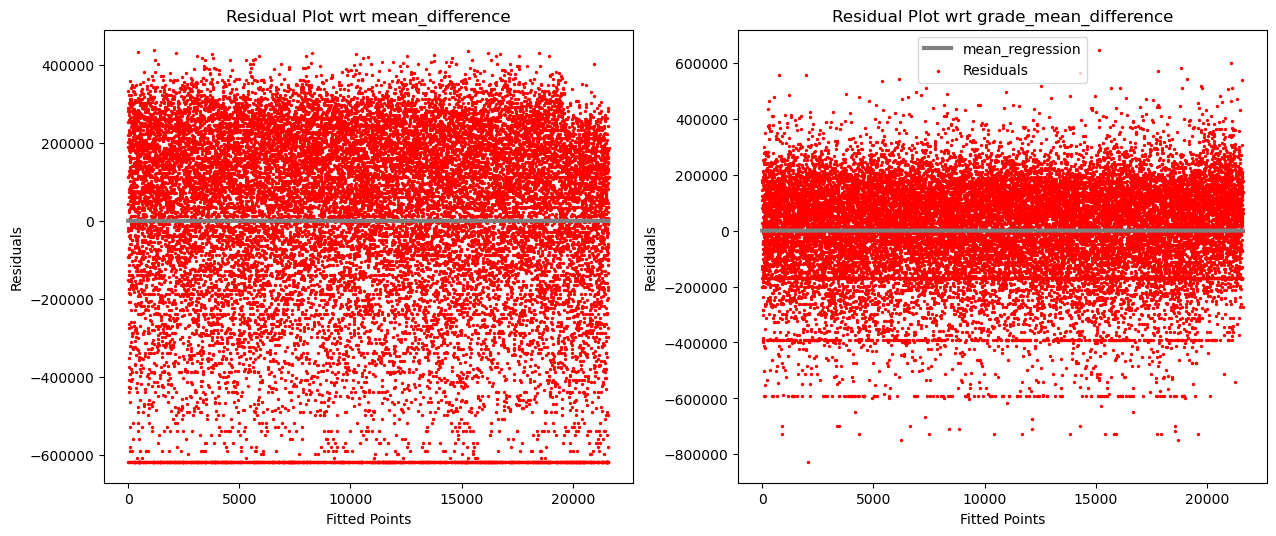

In [12]:
# Residual Plots

k = range(0, len(data))
l = [0 for i in range(0, len(data))]

plt.figure(figsize = (15,6), dpi = 100)

plt.subplot(1,2,1)
plt.scatter(k, mean_difference, color = 'red', label = 'Residuals', s=2)
plt.plot(k, l, color='grey', label = 'mean_regression', linewidth = 3)
plt.xlabel('Fitted Points')
plt.ylabel("Residuals")
plt.title('Residual Plot wrt mean_difference')

plt.subplot(1,2,2)
plt.scatter(k, grade_mean_difference, color = 'red', label = 'Residuals', s=2)
plt.plot(k, l, color='grey', label = 'mean_regression', linewidth = 3)
plt.xlabel('Fitted Points')
plt.ylabel("Residuals")
plt.title('Residual Plot wrt grade_mean_difference')

plt.legend()

- Linear Regression with Categorical difference is better model

**Model Evaluation Metrics**

In [13]:
cost = sum(mean_difference)/len(data)
print(round(cost,7))

0.0


**Mean Absolute Error**

In [14]:
y = data['Sale_Price']
y_hat1 = data['mean_sales']
y_hat2 = data['grade_mean']
n = len(data)
len(y), len(y_hat1), len(y_hat2), n

(21609, 21609, 21609, 21609)

In [15]:
mae_mean = sum(abs(y_hat1-y))/n
mae_mean

199168.78146839526

In [16]:
mae_grade_mean = sum(abs(y_hat2-y))/n
mae_grade_mean

137081.70298203363

MSE of grade_mean_model is less than simple mean_model. grade_mean_model is better model

In [17]:
from sklearn.metrics import mean_absolute_error as mae

In [18]:
mae_mean = mae(y_hat1, y)
mae_grade_mean = mae(y_hat2, y)
print(mae_mean, mae_grade_mean)

199168.7814684109 137081.7029820291


**Mean Squared Error**

In [19]:
from sklearn.metrics import mean_squared_error as mse

In [20]:
mse_mean = mse(y_hat1, y)
mse_grade = mse(y_hat2, y)
mse_mean, mse_grade

(62528116847.799576, 30804835720.342426)

**Root Mean Squared Error**

In [21]:
rsme_mean = mse(y_hat1, y)**0.5
rsme_grade = mse(y_hat2, y)**0.5
rsme_mean, rsme_grade

(250056.2273725643, 175513.06424406826)

RSME values > MAE values. But fall in the same nearest range

***R^2*** : tells how much accurate the model is.
     - gives relative error of a regression model wrt simple mean regression model
     - explain the degree to which the input variable values explain the variation of target variable.

In [22]:
R2 = 1 - (mse(y_hat2,y)/mse(y_hat1,y))
R2

0.5073442592981836

**Limitations of R2:**

- R2 value may stay same or increase on increasing the no of variable in the data, though they dont have any relationship with the target variable.
- Hence, Adjusted R2 value is calculated as it overcome the above limitation.

# Linear Regression

In [23]:
data = pd.read_csv("Transformed_Housing_Data_2.csv")
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zip_Group_Zipcode_Group_1,Zip_Group_Zipcode_Group_2,Zip_Group_Zipcode_Group_3,Zip_Group_Zipcode_Group_4,Zip_Group_Zipcode_Group_5,Zip_Group_Zipcode_Group_6,Zip_Group_Zipcode_Group_7,Zip_Group_Zipcode_Group_8,Zip_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({'sale_price':sale_price, 'flat_area':flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


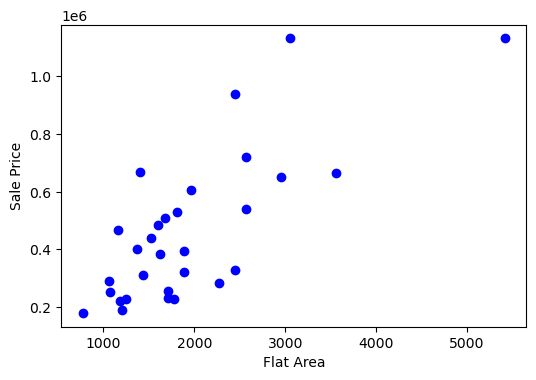

In [25]:
plt.figure(dpi = 100)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'blue')
plt.xlabel('Flat Area')
plt.ylabel("Sale Price")
plt.show()

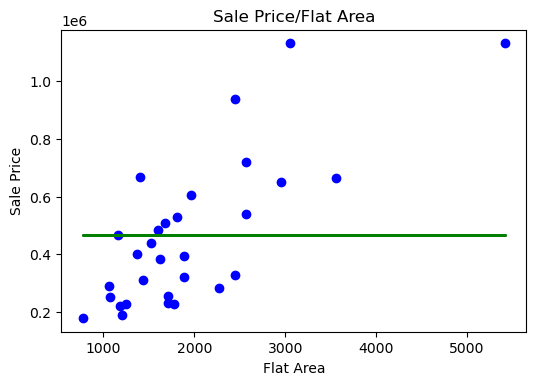

In [26]:
#mean_regression_model

sample_data['mean_sale_price'] = sample_data.sale_price.mean()

plt.figure(dpi = 100)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'blue')
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color = 'green', linewidth = 2)
plt.xlabel('Flat Area')
plt.ylabel("Sale Price")
plt.title('Sale Price/Flat Area')
plt.show()

# Cost Function Curve

- used to find the coefficients/parameters of a line(which is generally a regression line in this model), which fits best to the model with minimal error/distance of data points to the line. 

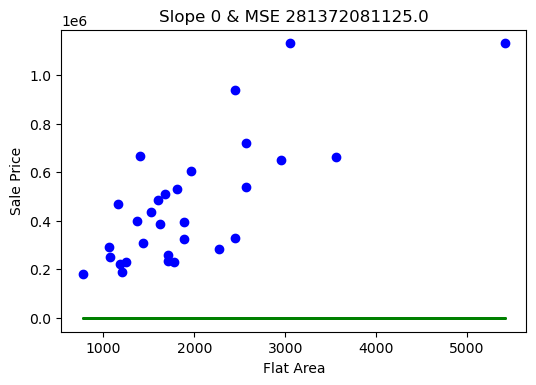

In [27]:
c = 0
m = 0

line = []

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)

MSE = mse(sample_data.sale_price, line)
plt.figure(dpi = 100)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'blue')
plt.plot(sample_data.flat_area, line, color = 'green', linewidth = 2, label = 'm=0 & c=0')
plt.xlabel('Flat Area')
plt.ylabel("Sale Price")
plt.title('Slope ' + str(m)+' & '+'MSE '+ str(MSE))
plt.show()

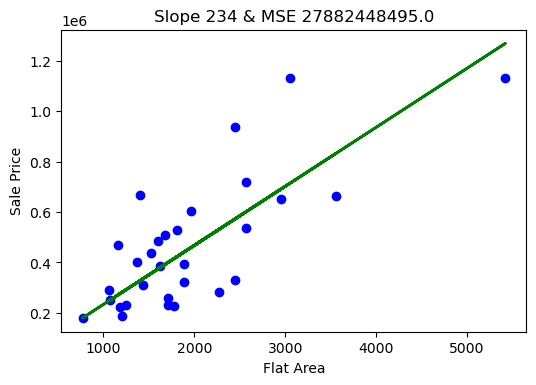

In [28]:
c = 0
m = 234

line =[]

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)
    
MSE = mse(sample_data.sale_price, line)
plt.figure(dpi = 100)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'blue')
plt.plot(sample_data.flat_area, line, color = 'green', linewidth = 2, label = 'm=234 & c=0')
plt.xlabel('Flat Area')
plt.ylabel("Sale Price")
plt.title('Slope ' + str(m)+' & '+'MSE '+ str(MSE))
plt.show()

In [29]:
def sale_error(slope, intercept, sample_data):
    sale =[]
    for i in range(len(sample_data)):
        k = sample_data.flat_area[i] * slope + intercept
        sale.append(k)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [30]:
slope = [i/10 for i in range(0,5000)]
intercept = 0
cost=[]
for i in slope:
    cost.append(sale_error(slope = i, intercept = 0, sample_data = sample_data))

In [31]:
cost_table = pd.DataFrame({
    'slope':slope,
    'cost': cost
})
cost_table.tail()

,slope,cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


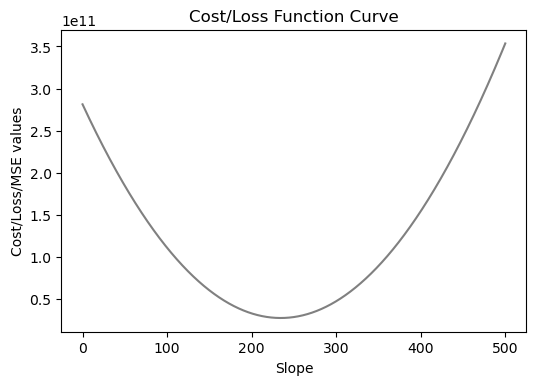

In [32]:
plt.figure(dpi = 100)
plt.plot(cost_table.slope, cost_table.cost, color = 'grey')
plt.xlabel("Slope")
plt.ylabel("Cost/Loss/MSE values")
plt.title("Cost/Loss Function Curve")
plt.show()

Cost function curve is the error corrwsponding to the different models or error of a model corresponding to different slopes. Lower the error, more better the model. 
- Convex curves have global minima (one minimum value and either side of minima, values will increase as in the above curve). Usually bowl in shape.

In [33]:
new_slope = cost_table['slope'][cost_table['cost'] == cost_table['cost'].min()].values
new_slope[0]

234.3

Finding the intercept value with slope = 234.3

In [34]:
def intercept_error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data)):
        sale.append(sample_data.flat_area[i] * slope + intercept)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [35]:
intercept = [i for i in range(5000,50000)]
slope = 234
cost =[]
for i in intercept:
    cost.append(intercept_error(slope = 234.3, intercept = i, sample_data = sample_data))

In [36]:
cost_table = pd.DataFrame({
    'intercepts': intercept,
    'cost':cost
})
cost_table.tail()

,intercepts,cost
44995,49995,2.935654e+10
44996,49996,2.935662e+10
44997,49997,2.935670e+10
44998,49998,2.935678e+10
44999,49999,2.935685e+10


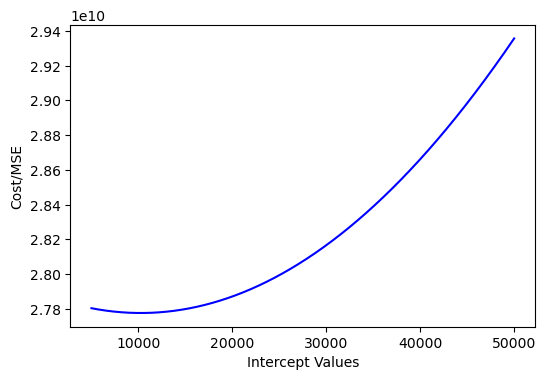

In [37]:
plt.figure(dpi = 100)
plt.plot(cost_table.intercepts, cost_table.cost, color = 'blue')
plt.xlabel('Intercept Values')
plt.ylabel('Cost/MSE')
plt.show()

In [38]:
new_intercept = cost_table['intercepts'][cost_table['cost'] == cost_table['cost'].min()].values
new_intercept[0]

10251

Re-finding the slope with INtercept value = 10251

In [39]:
def sale_error(slope, intercept, sample_data):
    sale =[]
    for i in range(len(sample_data)):
        k = sample_data.flat_area[i] * slope + intercept
        sale.append(k)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [40]:
slope = [i/10 for i in range(0,5000)]
intercept = 10834
cost=[]
for i in slope:
    cost.append(sale_error(slope = i, intercept = 10251, sample_data = sample_data))

In [41]:
cost_table = pd.DataFrame({
    'slope':slope,
    'cost': cost
})
cost_table.tail()

,slope,cost
4995,499.5,3.630749e+11
4996,499.6,3.633238e+11
4997,499.7,3.635728e+11
4998,499.8,3.638219e+11
4999,499.9,3.640712e+11


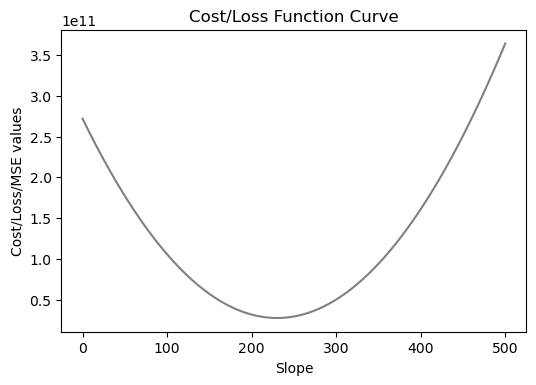

In [42]:
plt.figure(dpi = 100)
plt.plot(cost_table.slope, cost_table.cost, color = 'grey')
plt.xlabel("Slope")
plt.ylabel("Cost/Loss/MSE values")
plt.title("Cost/Loss Function Curve")
plt.show()

In [43]:
final_slope = cost_table['slope'][cost_table['cost']==cost_table['cost'].min()].values
final_slope[0]

230.0

Slope value is different from 234.3
- Repeating the process with updating the values of slope and intercept, at one point the both values wont change.
- m = 219, c = 39248

**Need for Gradient Descent Algorithm**

- Data with single input variable is possible to find the optimum slope and intercept values manually as done above.
- But, data with many input variables, it would become tedious. Hence, Gradient Descent Algorithm is needed.

# Gradient Descent Algorithm

- Parameter Initialisation

In [44]:
def param_init(Y):
    # Y = Dependent Variable
    m = 0.1
    c = Y.mean()
    return m, c

- Generating Predictions

In [45]:
def generate_predictions(m, c, X):
    # X = independent Variable
    predictions = []
    for x in X:
        pred = m*x + c
        predictions.append(pred)
    return predictions

- Calculating Cost:

In [46]:
def compute_cost(predictions, Y):
    cost = np.sum((predictions - Y)**2)/len(Y)
    return cost

Updating Parameters

- Calculating Gradients

In [47]:
def gradients(predictions, Y, X):
    n = len(Y)
    Gm = 2/n * np.sum((predictions - Y)*X)
    Gc = 2/n * np.sum(predictions - Y)
    return Gm, Gc

- Parameters Updating

In [52]:
def param_update(m_old, c_old, Gm_old, Gc_old, alpha):
    m_new = m_old - (alpha*Gm_old)
    c_new = c_old - (alpha*Gc_old)
    return m_new, c_new

In [53]:
def result(m, c, X, Y, cost, predictions, i):
    if i < max_iter:
        print("Gradient Descent Algorithm has converged before max_iter at iteration {}".format(i))
    else:
        print("*****Result after ", max_iter, " iterations is: ")
    plt.figure(figsize=(14,7), dpi = 120)
    plt.scatter(X, Y, color='red', label = 'Data Points')
    label = 'final regression line: m = {}, c = {}'.format(str(m), str(c))
    plt.plot(X, predictions, color = 'grey', label = label)
    plt.xlabel('flat_area')
    plt.ylabel('sale_price')
    plt.title('Final Regression Line')
    plt.legend()
    plt.show()

**Implementing Gradient Descent Algorithm**

After iteration  0  : m =  3499072.307222223  c =  465999.44299999997  cost_new =  64177937552.075005
After iteration  20  : m =  7.115927055971628e+105  c =  2.997778392048355e+102  cost_new =  2.7417231010181384e+208
After iteration  40  : m =  1.447154337383132e+205  c =  6.096532424296826e+201  cost_new =  inf
After iteration  60  : m =  2.9430538842431367e+304  c =  1.2398417341018387e+301  cost_new =  inf
After iteration  80  : m =  nan  c =  nan  cost_new =  nan
After iteration  100  : m =  nan  c =  nan  cost_new =  nan
After iteration  120  : m =  nan  c =  nan  cost_new =  nan
After iteration  140  : m =  nan  c =  nan  cost_new =  nan
After iteration  160  : m =  nan  c =  nan  cost_new =  nan
After iteration  180  : m =  nan  c =  nan  cost_new =  nan
After iteration  200  : m =  nan  c =  nan  cost_new =  nan
After iteration  220  : m =  nan  c =  nan  cost_new =  nan
After iteration  240  : m =  nan  c =  nan  cost_new =  nan
After iteration  260  : m =  nan  c =  nan  co

<ipython-input-46-fe5cc6331661>:2: RuntimeWarning: overflow encountered in square
  cost = np.sum((predictions - Y)**2)/len(Y)
C:\Users\sanja\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-54-0eb8872fc2ce>:15: RuntimeWarning: invalid value encountered in double_scalars
  if abs(cost_new - cost_old) < 10**(-7):
<ipython-input-47-30ef8e4f1481>:3: RuntimeWarning: overflow encountered in multiply
  Gm = 2/n * np.sum((predictions - Y)*X)
<ipython-input-52-58f2b31c187d>:2: RuntimeWarning: invalid value encountered in double_scalars
  m_new = m_old - (alpha*Gm_old)
<ipython-input-52-58f2b31c187d>:3: RuntimeWarning: invalid value encountered in double_scalars
  c_new = c_old - (alpha*Gc_old)


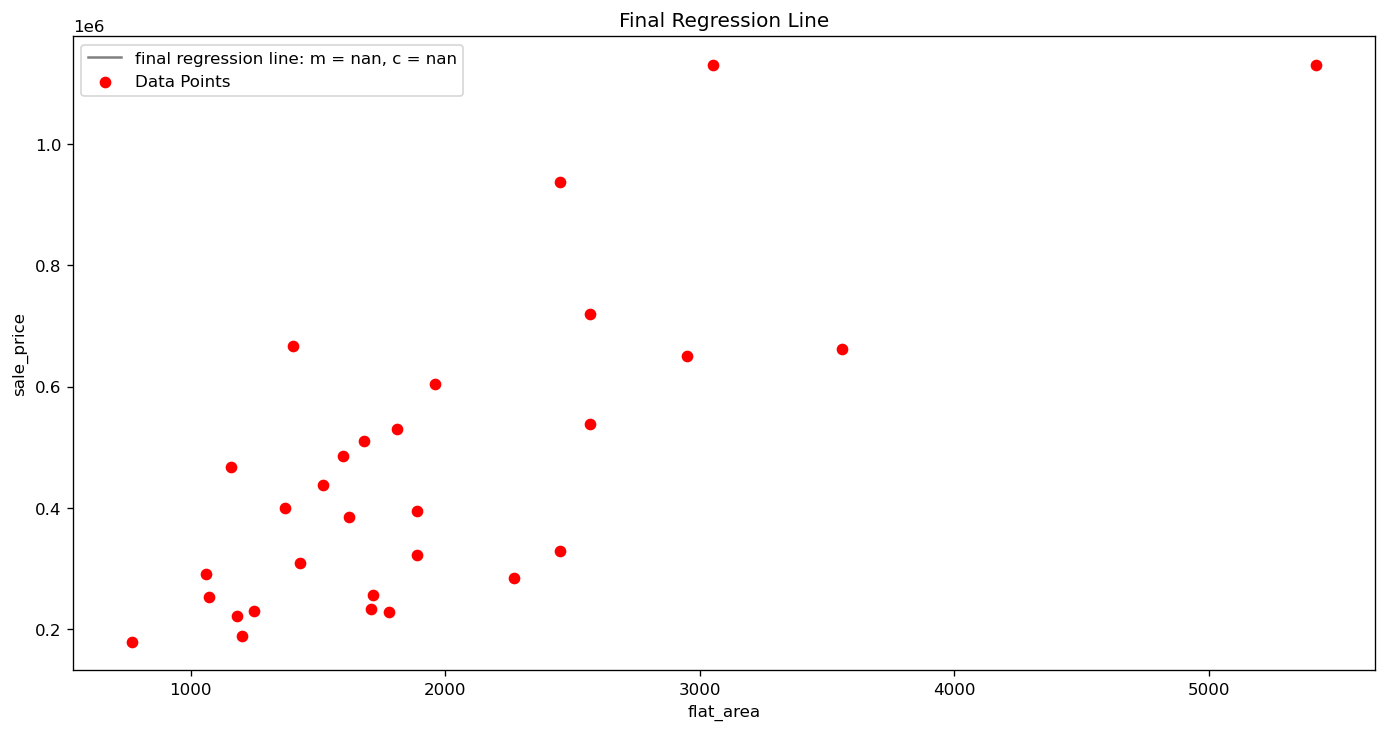

In [54]:
sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)

#declaring variables
max_iter = 1000
cost_old = 0
alpha = 0.01

m,c = param_init(sale_price)

for i in range(0, max_iter):
    predictions = generate_predictions(m, c, flat_area)
    
    cost_new = compute_cost(predictions, sale_price)
    if abs(cost_new - cost_old) < 10**(-7):
        break
        
    Gm, Gc = gradients(predictions, sale_price, flat_area)
    
    m, c = param_update(m, c, Gm, Gc, alpha)
    
    if i%20 ==0:
        print('After iteration ', i, ' : m = ', m, ' c = ', c, ' cost_new = ',cost_new)
    cost_old = cost_new
result(m, c, flat_area, sale_price, cost_new, predictions, i)

- Scaling data is necessary

After iteration 0 : m =  0.16581732068166516  c =  1.1879386363489176e-16  cost_new =  0.8583653586366701
After iteration 20 : m =  0.6861565598533277  c =  1.6801375105994037e-16  cost_new =  0.43157634826762675
After iteration 40 : m =  0.7494176638040206  c =  1.6967908559687811e-16  cost_new =  0.4252680298646713
After iteration 60 : m =  0.7571087371880522  c =  1.6727360237685694e-16  cost_new =  0.42517478734879977
Gradient Descent Algorithm has converged before max_iter at iteration 66


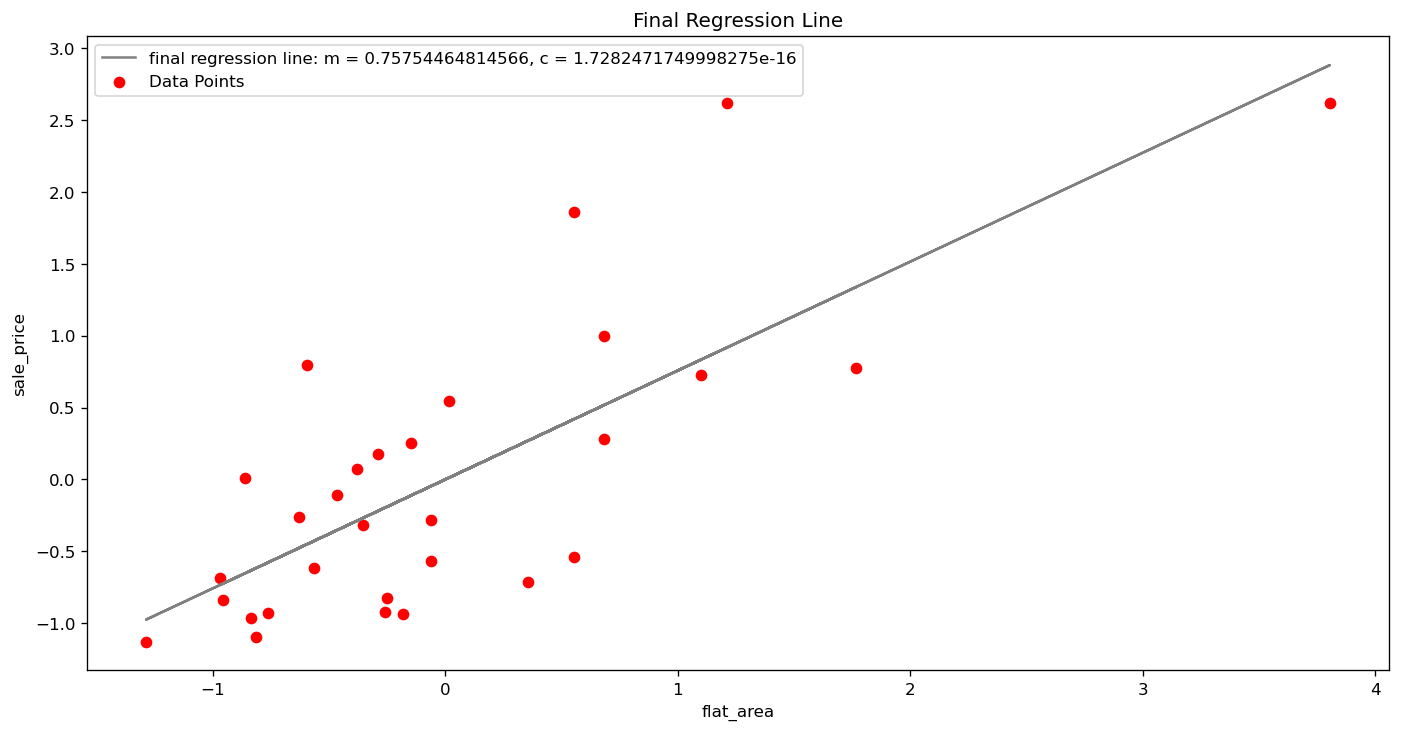

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#defining & re-shaping dataset
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

#declaring variables
max_iter = 1000
cost_old = 0
alpha = 0.05

m,c = param_init(sale_price)

for i in range(0, max_iter):
    predictions = generate_predictions(m, c, flat_area)
    
    cost_new = compute_cost(predictions, sale_price)
    if abs(cost_new - cost_old) < 10**(-7):
        break
        
    Gm, Gc = gradients(predictions, sale_price, flat_area)
    
    m, c = param_update(m, c, Gm, Gc, alpha)
    
    if i%20 ==0:
        print('After iteration', i, ': m = ', m, ' c = ', c, ' cost_new = ',cost_new)
    cost_old = cost_new
result(m, c, flat_area, sale_price, cost_new, predictions, i)

**Steps to implement Linear Regression:**

- Importing all the libraries and dataset
- Scaling the dataset
- Treating the multicollinearity and removing it
- Creating train and test partitions
- Implementing the linear regression model using scikit.learn 
- Generating the predictions for the test data
- Evavluating the model
- Plotting the residuals
- Verifying the assumptions of Linear Regression
- Visualising the coefficients to interpret the model results

**1. Importing the Libraries and dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data = pd.read_csv("Transformed_Housing_Data_2.csv")
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zip_Group_Zipcode_Group_1,Zip_Group_Zipcode_Group_2,Zip_Group_Zipcode_Group_3,Zip_Group_Zipcode_Group_4,Zip_Group_Zipcode_Group_5,Zip_Group_Zipcode_Group_6,Zip_Group_Zipcode_Group_7,Zip_Group_Zipcode_Group_8,Zip_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


**"Transformed_Housing_Data_2.csv"** was formed after:

- Exploring the target and independent variables
- Treating the outliers and the missing values of both target and independent variables
- Transforming categorical variables into numerical variables using dummy encoding

**2. Scaling the Dataseet**

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zip_Group_Zipcode_Group_1,Zip_Group_Zipcode_Group_2,Zip_Group_Zipcode_Group_3,Zip_Group_Zipcode_Group_4,Zip_Group_Zipcode_Group_5,Zip_Group_Zipcode_Group_6,Zip_Group_Zipcode_Group_7,Zip_Group_Zipcode_Group_8,Zip_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


**3. Treating Multicollinearity and Removing it**

In [4]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zip_Group_Zipcode_Group_1,Zip_Group_Zipcode_Group_2,Zip_Group_Zipcode_Group_3,Zip_Group_Zipcode_Group_4,Zip_Group_Zipcode_Group_5,Zip_Group_Zipcode_Group_6,Zip_Group_Zipcode_Group_7,Zip_Group_Zipcode_Group_8,Zip_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,0.018573,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.050282,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.055111,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.007736,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.006297,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.104051,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.010010,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.023202,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.070969,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.225182,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [5]:
## pair of independent variables with correlation > 0.5
k = X.corr()
# list comprehension = putting the independent variables in alist which have correlation > 0.5
z = [[str(i), str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5)) & (i != j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

How Multicollinearity is treated? Yes we can do that using **VIF (Variance Inflation Factor)**

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)

VIF, len(VIF)

(No of Bedrooms                                  1.639470
 No of Bathrooms                                 3.374992
 Flat Area (in Sqft)                          1481.681648
 Lot Area (in Sqft)                              2.108079
 No of Floors                                    2.127787
 No of Times Visited                             1.432385
 Overall Grade                                   2.967448
 Area of the House from Basement (in Sqft)    1205.549115
 Basement Area (in Sqft)                       345.465009
 Age of House (in Years)                         2.629539
 Latitude                                        2.471442
 Longitude                                       1.672691
 Living Area after Renovation (in Sqft)          3.068139
 Lot Area after Renovation (in Sqft)             2.144347
 Years since Renovated                           2.788098
 Condition_of_the_House_Excellent               53.578111
 Condition_of_the_House_Fair                   166.129930
 Condition_of_

In [7]:
a = VIF[VIF == VIF.max()].index[0]
a

'Flat Area (in Sqft)'

In [8]:
def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
    if vif.max()>5:
        print(vif[vif == vif.max()].index[0], 'has been removed')
        data = data.drop(columns = [vif[vif == vif.max()].index[0]])
        return data
    else:
        print('No multicollinearity present anywhere')
        return data

In [9]:
for i in range(7):
    vif_data = MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No multicollinearity present anywhere
No multicollinearity present anywhere
No multicollinearity present anywhere
No multicollinearity present anywhere
No multicollinearity present anywhere


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Ever_Renovated_Yes,Zip_Group_Zipcode_Group_1,Zip_Group_Zipcode_Group_2,Zip_Group_Zipcode_Group_3,Zip_Group_Zipcode_Group_4,Zip_Group_Zipcode_Group_5,Zip_Group_Zipcode_Group_6,Zip_Group_Zipcode_Group_7,Zip_Group_Zipcode_Group_8,Zip_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [10]:
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(VIF)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years since Renovated                        2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Waterfront_View_Yes                          1.208288
 Ever_Reno

**4. Creating train and test partitions**

In [11]:
x = vif_data
y = data['Sale_Price']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

**5. Implementing Linear Resgression using sklearn**

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
# normalize = True - normalizes all the independent variables and linear regression need not to calculate the value of intercept
lr.fit(x_train, y_train)
#lr.fit() function will implement the gradient descent and sets the procedure

LinearRegression(normalize=True)

In [14]:
lr.coef_
# values of m1,m2,m3,m4,m5,m6,........

array([ -5098.33295911,  13444.86347856,  10636.27284046,   3367.49926631,
        26939.44666791,  58437.77581135,  80156.76348241,  27938.14951311,
        27504.466964  ,  22157.93829222, -23479.91175396,  18679.8479085 ,
         -501.27413599, -12407.63351727,  13128.26122812,   6209.29933635,
        -1308.85676974,  10776.08602271,  17316.65993567,  12526.81446989,
        33839.48170392,  61635.24576844,  79975.28965117,  50022.43057622,
        73214.79515182,  41070.30927178,  67633.75226906,  21641.8490839 ])

**6. Generating the predictions of test data**

In [15]:
predictions = lr.predict(x_test)
print(predictions)

[332697.34355773 666715.90879196 316507.25702986 ... 242895.70229652
 692912.94660607 783363.8887324 ]


**7. Evaluating the model**

In [16]:
lr.score(x_test, y_test)

0.8420486082190843

In [17]:
def adjusted_R2(data_x, data_y, predictions):
    n = len(data_y)
    m = len(data_x.columns)
    from sklearn.metrics import r2_score
    R = r2_score(data_y, predictions)
    adj_r2 = 1 - ((1-R)*(n-1))/(n-m-1)
    return adj_r2

In [18]:
adjusted_R2(x_test, y_test, predictions)

0.8413633527232887

**Adjusted R2 < lr.score** = tells that there are some features that don not add value to the model.

**8. Plotting the Residuals**

In [66]:
residuals = predictions - y_test
residuals_table = pd.DataFrame({'Residuals':residuals,
                               'Predictions': predictions})
residuals_table = residuals_table.sort_values( by = 'Predictions')
residuals_table.head()

,Residuals,Predictions
1147,-231180.599410,-156180.599410
8621,-293606.039884,31393.960116
858,-205368.092882,39631.907118
348,-258506.269821,40493.730179
16950,-84079.168543,44920.831457


In [67]:
z = [i for i in range(int(residuals_table['Predictions'].max()))]
k = [0 for i in range(int(residuals_table['Predictions'].max()))]

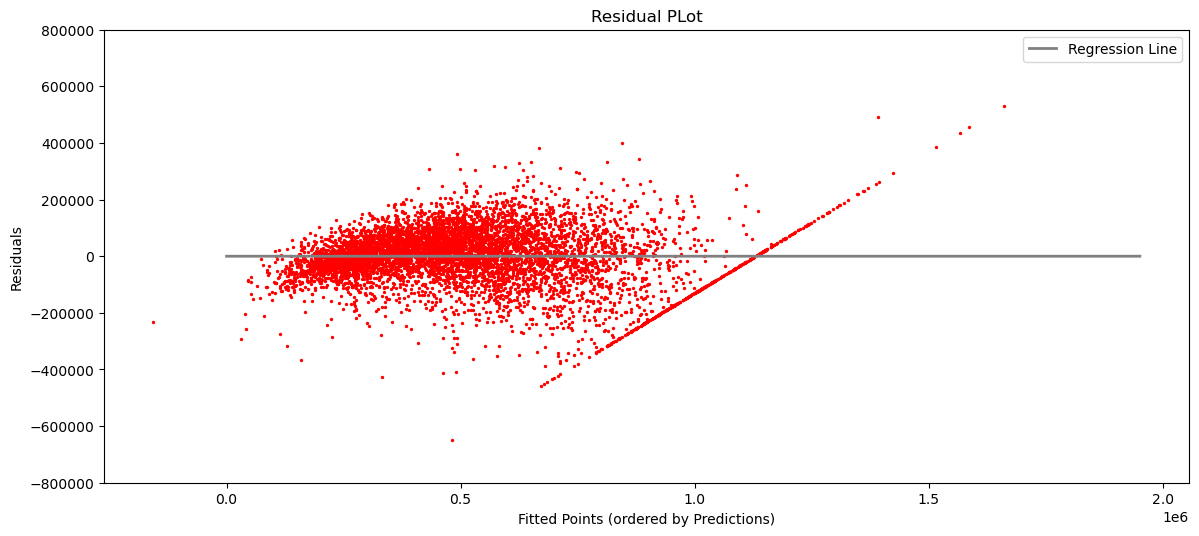

In [74]:
plt.figure(figsize = (14,6), dpi = 100)
plt.scatter(residuals_table['Predictions'], residuals_table['Residuals'], color ='red', s = 2)
plt.plot(z, k, color = 'grey', linewidth = 2, label = 'Regression Line')
plt.ylim(-800000, 800000)
plt.xlabel('Fitted Points (ordered by Predictions)')
plt.ylabel('Residuals')
plt.title('Residual PLot')
plt.legend()
plt.show()

**9. Verifying the Assumptions of Linear Regression**

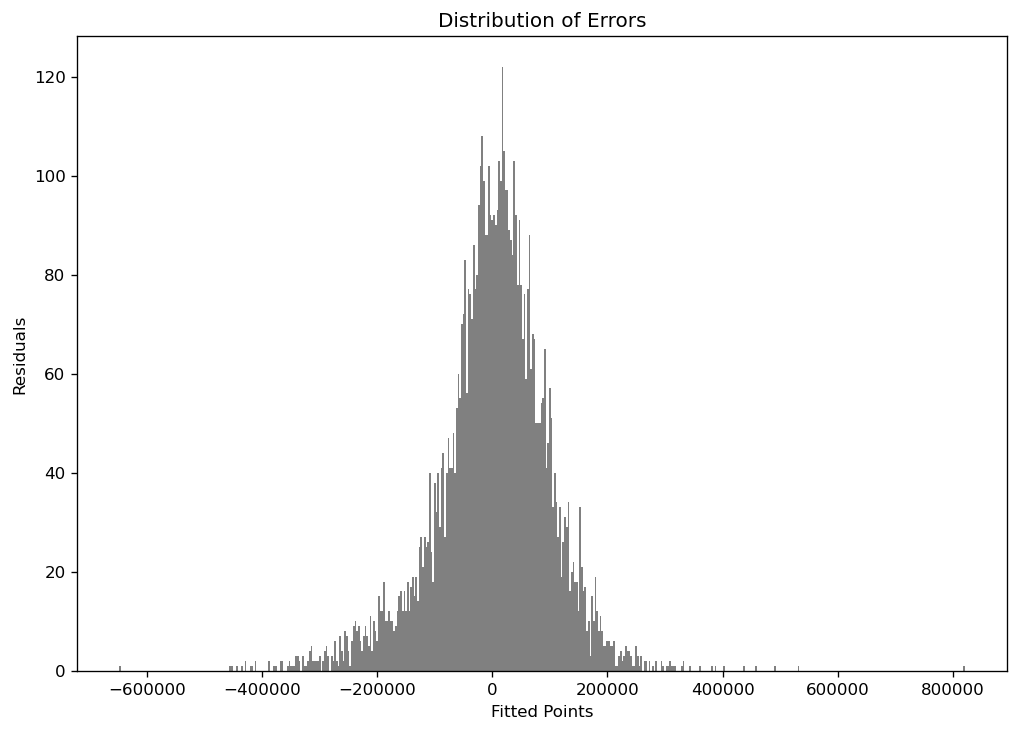

In [77]:
plt.figure(figsize = (10,7), dpi = 120)
plt.hist(residuals_table['Residuals'], color = 'grey', bins = 500)
plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.title('Distribution of Errors')
plt.show()

**10. Visualising the coefficients to interpret the model results**

In [78]:
coef_table = pd.DataFrame({'columns':x_train.columns,
                          'Coefficients':lr.coef_})
coef_table = coef_table.sort_values(by = 'Coefficients')

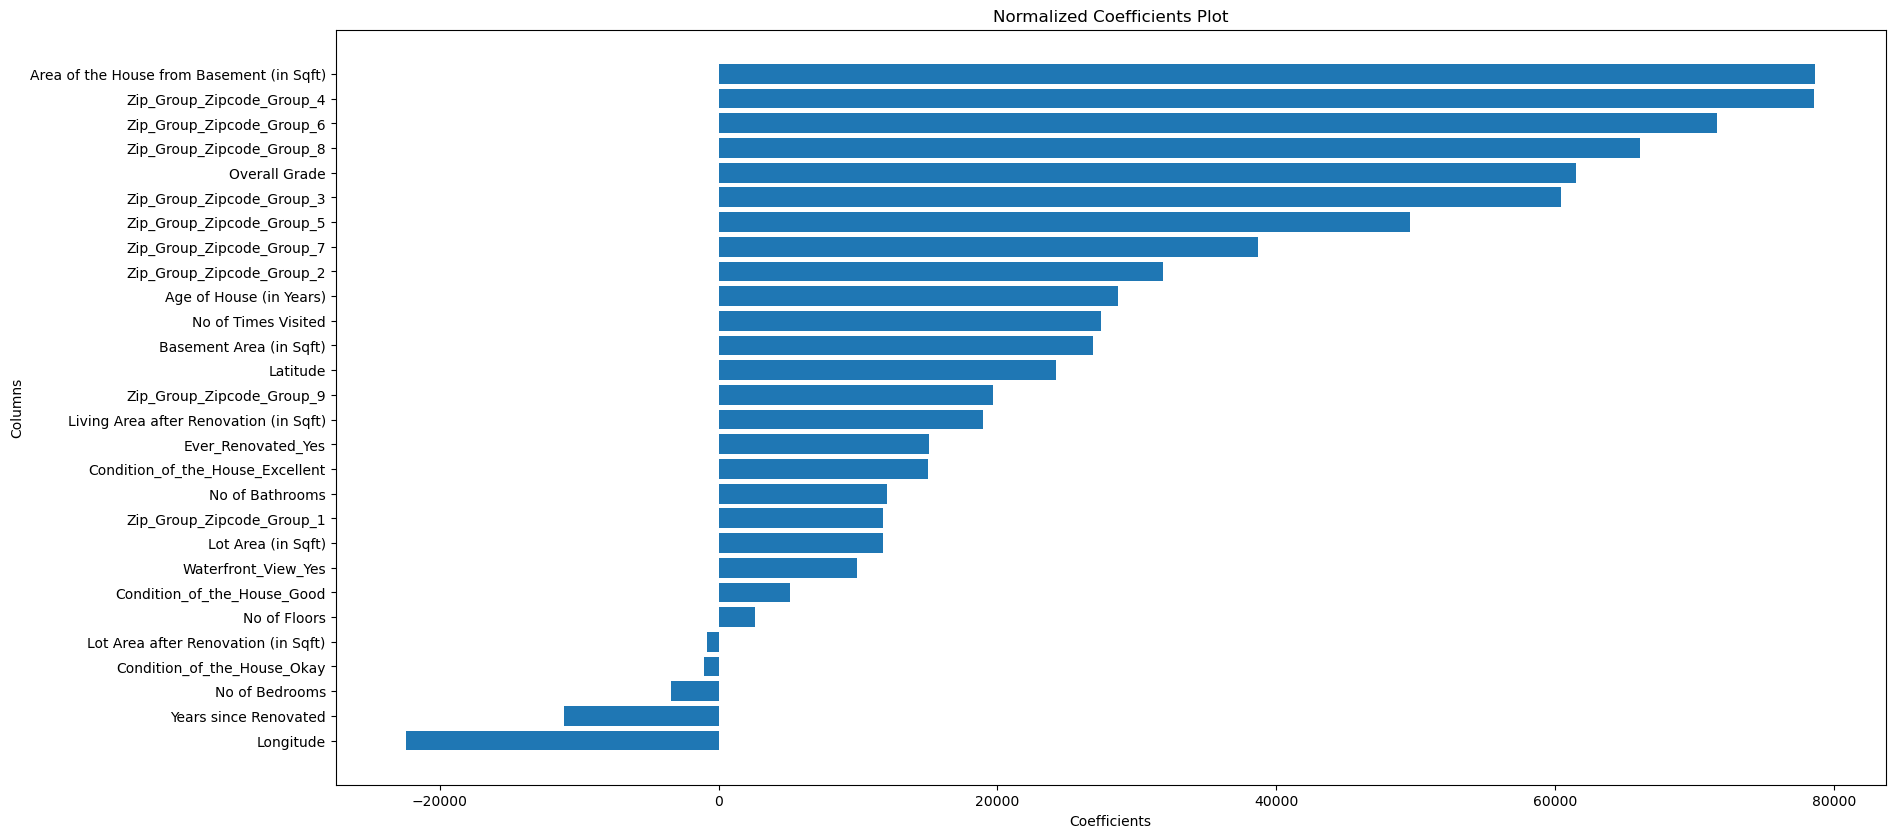

In [85]:
plt.figure(figsize = (20,10), dpi = 100)
a = coef_table['columns']
b = coef_table['Coefficients']
plt.barh(a, b)
plt.xlabel('Coefficients')
plt.ylabel('Columns')
plt.title("Normalized Coefficients Plot")
plt.show()